In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_log_error
import lightgbm as lgb
import xgboost as xgb
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df_master = pd.read_csv("MasterFinal_f.csv")

In [4]:
df_master.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,title,id,release_date,year,Director Ind,budget,...,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0
0,0,0,0,0,Toy Story,862,1995-10-30,1995.0,John Lasseter,30000000,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_master.columns.to_list()

['Unnamed: 0',
 'title',
 'id',
 'release_date',
 'year',
 'month',
 'Director Ind',
 'budget',
 'runtime',
 'director_median_vote',
 'director_median_revenue',
 'Top3cast_median_revenue',
 'budget_inflation_reverse',
 'budget_inflation_to2020',
 'trend_average',
 'Director_Number',
 'country_count',
 'genre_count',
 'company_count',
 'cast_count',
 'awardedcast',
 'book',
 'isenglish',
 'country_Angola',
 'country_Argentina',
 'country_Australia',
 'country_Austria',
 'country_Bahamas',
 'country_Belarus',
 'country_Belgium',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Chile',
 'country_China',
 'country_Costa Rica',
 'country_Croatia',
 'country_Czech Republic',
 'country_Denmark',
 'country_Ecuador',
 'country_Egypt',
 'country_Estonia',
 'country_Finland',
 'country_France',
 'country_Germany',
 'country_Gibraltar',
 'country_Greece',
 'country_Guatemala',
 'country_Hong Kong',
 'country_Hungary',
 'country_Iceland',
 'country_India',
 'country_Iran',
 'cou

In [5]:
col_to_drop = ["Unnamed: 0","title","id","release_date","year","Director Ind","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.1.1.1"]

In [5]:
col_to_drop = ['Unnamed: 0',
 'title',
 'id',
 'release_date',
 'year',
 'month_6.0',
 'Director Ind','country_Angola','genre_Adventure','company_Amblin Entertainment',
    "budget_inflation_reverse","budget_inflation_to2020"]

In [6]:
df_master = df_master.drop(col_to_drop,axis=1)

In [52]:
df_master = df_master[df_master["revenue"]>0]

In [7]:
df_master.shape

(8133, 195)

In [8]:
X = df_master.drop("revenue",axis=1)

In [9]:
df_master['profit'] = df_master["revenue"] - 3 * df_master["budget"]
df_master["target"] = df_master["profit"].apply(lambda x: 1 if x >= 0 else 0)
df_master["target"].value_counts()

0    6303
1    1830
Name: target, dtype: int64

In [10]:
y = df_master["target"]

In [11]:
X_scaled_std = StandardScaler().fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_std,y, random_state=0)

In [13]:
# grid of parameters 1
gridParams = {
   'learning_rate': [0.01,0.02,0.03,0.04,0.05],
   'num_leaves': [90,150,200],
   'boosting_type' : ['gbdt'],
   'objective' : ['binary'],
   'max_depth' : [5,6,7,8],
   'random_state' : [501], 
   'colsample_bytree' : [0.5,0.7],
   'subsample' : [0.5,0.7],
   'min_split_gain' : [0.01],
   'min_data_in_leaf':[10],
   'metric':['auc']
   }

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.7min finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 8,
 'metric': 'auc',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 150,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

In [16]:
# grid of parameters 2
gridParams = {
   'learning_rate': [0.45,0.05,0.55,0.6],
   'num_leaves': [140,150,160],
   'boosting_type' : ['gbdt'],
   'objective' : ['binary'],
   'max_depth' : [8,9,10,11],
   'random_state' : [501], 
   'colsample_bytree' : [0.7,0.8],
   'subsample' : [0.5,0.6],
   'min_split_gain' : [0.01],
   'min_data_in_leaf':[10],
   'metric':['auc']
   }

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  8.1min finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'metric': 'auc',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 160,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

In [19]:
gridParams = {
    'boosting_type': ['gbdt'],
    'colsample_bytree': [0.7],
    'learning_rate': [0.05],
    'max_depth': [10],
    'metric': ['auc'],
    'min_data_in_leaf': [10],
    'min_split_gain': [0.01],
    'num_leaves': [160,170,180],
    'objective': ['binary'],
    'random_state': [501],
    'subsample': [0.5]}

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.0s finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'metric': 'auc',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 170,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

In [20]:
y_pred = grid.predict(X_test)

In [15]:
# Check best threshold
threshold_value = []
accuracy_value = []
y_pred2 = []
for i in np.linspace(0,1,100):
    
    threshold = i
    for z in range(X_test.shape[0]):
        if y_pred[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
        
    threshold_value.append(i)
   
    accuracy_value.append(accuracy_score(y_pred2,y_test))
    y_pred2 = []
df_threshold = pd.DataFrame(list(zip(threshold_value,accuracy_value)), columns=["threshold","accuracy"])

df_threshold[df_threshold["accuracy"] ==  df_threshold["accuracy"].max()]

,threshold,accuracy
45,0.454545,0.837079
46,0.464646,0.837079


In [78]:
# setting threshold to number
y_pred2 = []
threshold = 0.454545
for i in range(X_test.shape[0]):
    if y_pred[i] >= threshold:       
       y_pred2.append(1)
    else:  
       y_pred2.append(0)

In [79]:
# Evaluation metricks
print('AUC of LGB classifier on test set:{:.3f}\n'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy of LGB  classifier on test set: {:.3f}\n'.format(accuracy_score(y_test,y_pred2)))
print('Precision of LGB  classifier on test set: {:.3f}\n'.format(precision_score(y_test,y_pred2)))
print('Recall of LGB  classifier on test set: {:.3f}\n'.format(recall_score(y_test,y_pred2)))
print('F1_score of LGB  classifier on test set: {:.3f}\n'.format(f1_score(y_test,y_pred2)))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred2))

AUC of LGB classifier on test set:0.891

Accuracy of LGB  classifier on test set: 0.837

Precision of LGB  classifier on test set: 0.790

Recall of LGB  classifier on test set: 0.738

F1_score of LGB  classifier on test set: 0.763

Confusion matrix
 [[716  87]
 [116 327]]


Text(0, 0.5, 'Feature Importance Score')

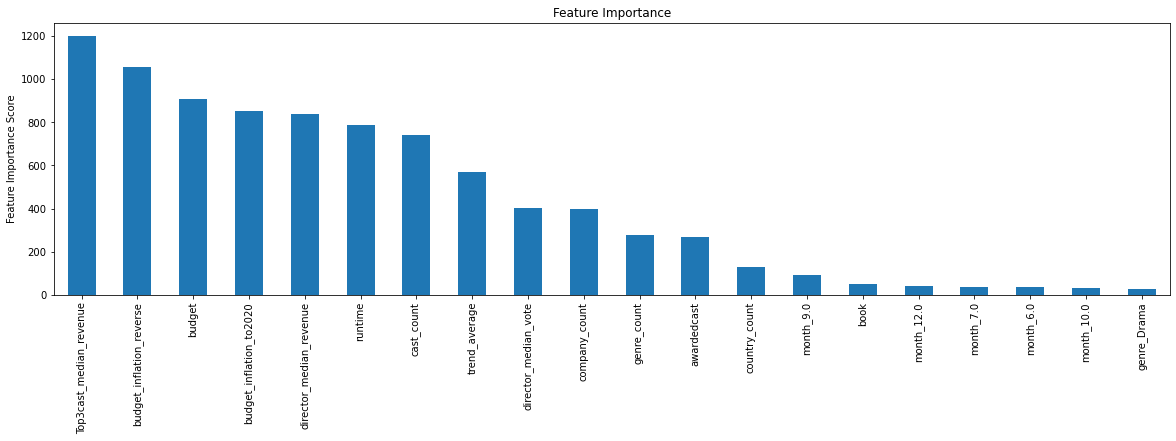

In [80]:
#Feature importance for top 50 predictors
predictors = [x for x in X.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:20]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

In [81]:
df_send = pd.DataFrame(feat_imp,columns=["Importance Value"])

In [82]:
df_send.to_csv("to_Page.csv")